In [1]:
import Pkg
Pkg.activate("../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using DataFrames, TimeSeries, XLSX
using StatsBase
using Plots


In [21]:
df = DataFrame(XLSX.readtable("../data/usa_data.xlsx", "Data", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :Date), Dates.year, first)

div_growth = percentchange(data_source[:Dividend])

dy = data_source[:Dividend] ./ data_source[:Stock_Price]

sr = from(data_source[:T_Bill], Date(1971, 12, 31))

initial_div_growth = to(div_growth, Date(1971, 12, 31)) 

div_growth = from(div_growth, Date(1971, 12, 31))

dy = from(dy, Date(1971, 12, 31))

53×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1972-01-01 to 2024-01-01
┌────────────┬──────────────────────┐
│            │ Dividend_Stock_Price │
├────────────┼──────────────────────┤
│ 1972-01-01 │            0.0295363 │
│ 1973-01-01 │             0.027263 │
│ 1974-01-01 │            0.0354147 │
│ 1975-01-01 │            0.0473717 │
│ 1976-01-01 │            0.0365523 │
│ 1977-01-01 │            0.0406089 │
│ 1978-01-01 │             0.053296 │
│ 1979-01-01 │            0.0516028 │
│     ⋮      │          ⋮           │
│ 2018-01-01 │            0.0175803 │
│ 2019-01-01 │            0.0201706 │
│ 2020-01-01 │            0.0183331 │
│ 2021-01-01 │            0.0155748 │
│ 2022-01-01 │            0.0136076 │
│ 2023-01-01 │            0.0166266 │
│ 2024-01-01 │            0.0145803 │
└────────────┴──────────────────────┘
                      38 rows omitted

In [22]:
display(mean(div_growth) .* 4)
display(std(div_growth) .* 4^.5)

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-01-01 to 2024-01-01
┌────────────┬──────────┐
│            │ Dividend │
├────────────┼──────────┤
│ 2024-01-01 │ 0.250056 │
└────────────┴──────────┘

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-01-01 to 2024-01-01
┌────────────┬──────────┐
│            │ Dividend │
├────────────┼──────────┤
│ 2024-01-01 │ 0.123563 │
└────────────┴──────────┘

In [36]:
v = .03

T = length(div_growth)
exp_div_growth = zeros(T + 1)

exp_div_growth[1] = values(mean(initial_div_growth))[1] 

for t in 2:T+1
    exp_div_growth[t] = v * values(div_growth)[t-1] + (1 - v) * exp_div_growth[t-1]
end

exp_div_growth = TimeArray(timestamp(div_growth), exp_div_growth[2:end]) 

53×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1972-01-01 to 2024-01-01
┌────────────┬───────────┐
│            │ A         │
├────────────┼───────────┤
│ 1972-01-01 │  0.039227 │
│ 1973-01-01 │ 0.0389622 │
│ 1974-01-01 │ 0.0402275 │
│ 1975-01-01 │  0.041009 │
│ 1976-01-01 │ 0.0401078 │
│ 1977-01-01 │ 0.0426206 │
│ 1978-01-01 │ 0.0457829 │
│ 1979-01-01 │ 0.0469322 │
│     ⋮      │     ⋮     │
│ 2018-01-01 │ 0.0590723 │
│ 2019-01-01 │ 0.0602613 │
│ 2020-01-01 │ 0.0609783 │
│ 2021-01-01 │ 0.0584969 │
│ 2022-01-01 │ 0.0586075 │
│ 2023-01-01 │ 0.0599419 │
│ 2024-01-01 │ 0.0594144 │
└────────────┴───────────┘
           38 rows omitted

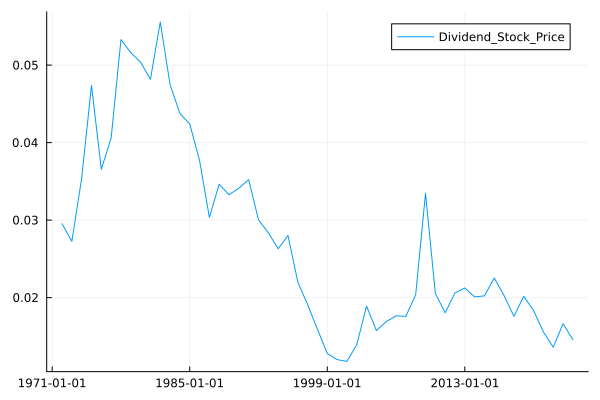

In [37]:
plot(dy)

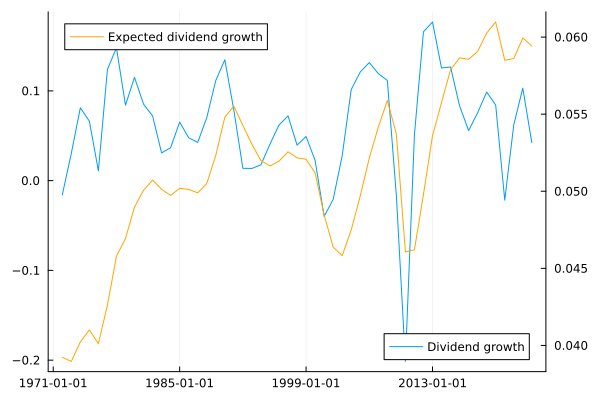

In [38]:
plot(div_growth; label="Dividend growth")
plot!(twinx(), exp_div_growth;label="Expected dividend growth", color= "orange")

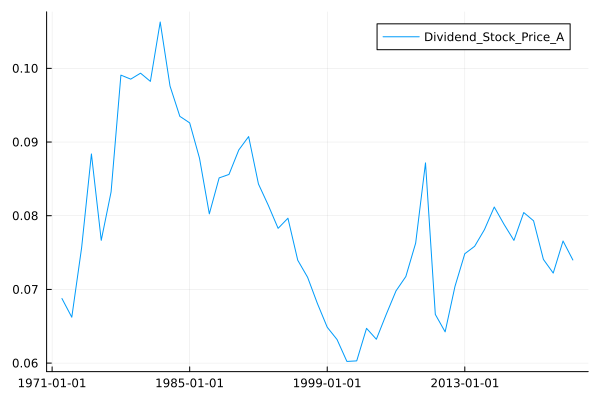

In [43]:
expected_equity_return = dy .+ exp_div_growth 
plot(expected_equity_return)

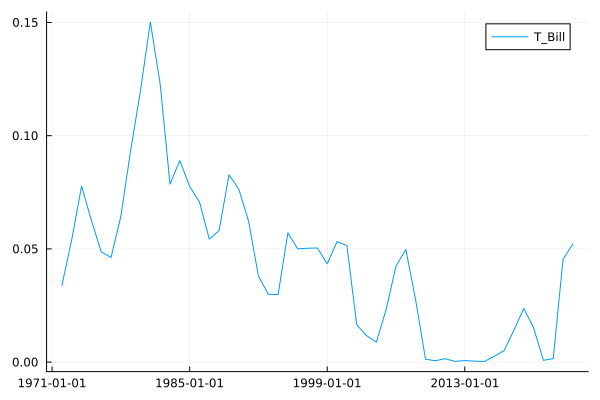

In [44]:
plot(sr)

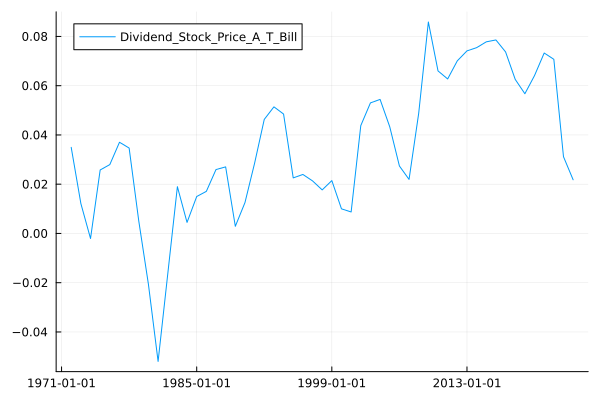

In [45]:
equity_premium = dy .+ exp_div_growth .- sr
plot(equity_premium)

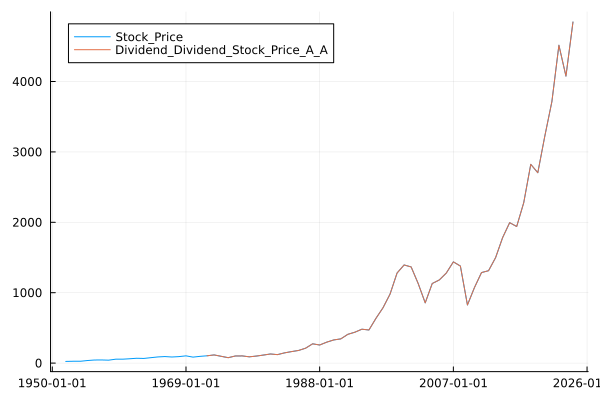

In [42]:
est_prices = data_source[:Dividend] ./ (expected_equity_return .- exp_div_growth)

plot(data_source[:Stock_Price])
plot!(est_prices)